# Shohei Ohtani, Founder of the 50/50 Club (2024)
Visualising Ohtani's run to 50+ HR and 50+ SB.  

This analysis was inspired by [Ben Clemmen's Fangraphs post](https://blogs.fangraphs.com/of-course-this-is-how-shohei-ohtani-makes-history/). 

Last updated 9/24/2024


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from io import StringIO 

In [31]:
YEAR = 2024
id_bref = 'ohtansh01'
type = 'b'

url = f"https://www.baseball-reference.com/players/gl.fcgi?id={id_bref}&t={type}&year={YEAR}"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
table_id = 'batting_gamelogs'

# Reference: PyBaseball Game Logs library - https://github.com/jldbc/pybaseball/blob/master/pybaseball/team_game_logs.py
table = soup.find('table', {'id': table_id})
if table is None:
    raise RuntimeError(f"Table w/ id {table_id} not found on {url}")
table = pd.read_html(StringIO(str(table)))[0]

In [32]:
df = table[['Gtm', 'HR', 'SB']]
df = df.drop(df.index[-1])
df = df[pd.to_numeric(df['HR'], errors='coerce').notnull()]
df['HR'] = pd.to_numeric(df['HR'], errors='coerce')
df['SB'] = pd.to_numeric(df['SB'], errors='coerce')

# Sum HR and SB 
df['Cumulative_HR'] = df['HR'].cumsum()
df['Cumulative_SB'] = df['SB'].cumsum()

In [33]:
df['Gtm'] = df['Gtm'].str.extract(r'(\d+)')
df['Gtm'] = df['Gtm'].astype('int64')

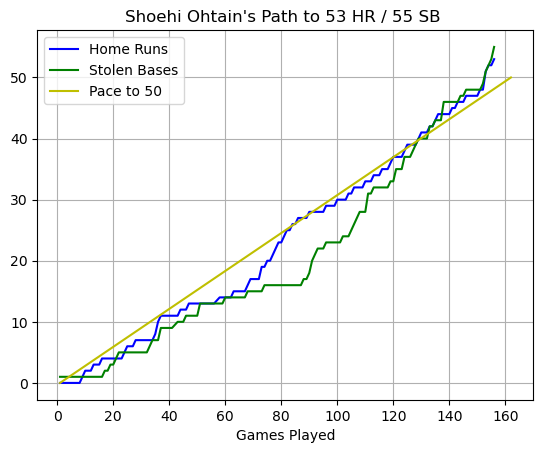

In [34]:
total_hr = df['Cumulative_HR'].iloc[-1]
total_sb = df['Cumulative_SB'].iloc[-1]

fig, ax = plt.subplots()
ax.plot(df['Gtm'], df['Cumulative_HR'], label='Home Runs', linestyle='-', color = 'b')
ax.plot(df['Gtm'], df['Cumulative_SB'], label='Stolen Bases', linestyle='-', color = 'g')
ax.plot([1,162], [0, 50], label='Pace to 50', color = 'y')
ax.set_title(f"Shoehi Ohtain's Path to {total_hr} HR / {total_sb} SB ")
ax.set_xlabel('Games Played')
ax.legend()
ax.grid()

plt.show()